# Versuch 253: Absorption von $\alpha$-, $\beta$- & $\gamma$-Strahlung

## Auswertung der Messergebnisse

In [1]:
#Benötigte Pakete
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2
import matplotlib.pyplot as plt
%matplotlib inline 
#Plot settings
plt.rcParams['errorbar.capsize']=2

### Teil 1: Messung des Nulleffekts

In [2]:
#Betriebsspannung
U1=525 #V
U1_err=5 #V

#Zerfälle in 5 Minuten = 300s
n0=118
n0_err=np.sqrt(118)

#Normierung auf Zerfälle/Sekunde
n0_s=140/300
n0_s_err=n0_err/300

### Teil 2: Absorption von $\beta$-Strahlung in Aluminium

In [3]:
#Anzahl Zerfälle
n_beta=np.array([1248, 708, 498, 398, 252, 136, 89, 54, 167, 120, 76, 65, 50])
n_beta_err=np.sqrt(n_beta)

#Torzeit
T=np.array([30, 30, 30, 30, 30, 30, 30, 30, 120, 120, 120, 120, 120])

#Absorberdicke in mm
x1=np.arange(13)*0.3

#aus letztem Messwert wird n0_beta bestimmt, n0_beta in Zerfälle/s
n0_beta=114/300
n0_beta_err=np.sqrt(114)/300

#Abzug der Nullmessung unter Berücksichtigung der jeweiligen Torzeit, angegeben in Zerfälle/s
n_beta_korr=n_beta/T-n0_beta
n_beta_korr_err=np.sqrt((n_beta_err/T)**2+n0_beta_err**2)

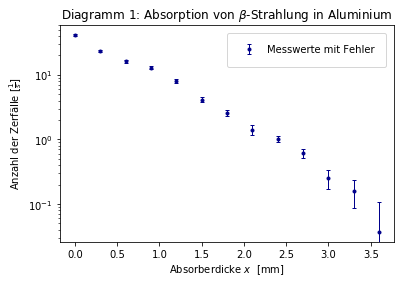

In [4]:
#Plot der Messdaten
plt.errorbar(x1,n_beta_korr, yerr=n_beta_korr_err,linewidth=1,linestyle='',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.xlabel(r'Absorberdicke $ x$  [mm]')
plt.ylabel(r'Anzahl der Zerfälle [$\frac{1}{s}$]')
plt.yscale('log')
plt.legend(frameon=True,fontsize='medium',loc='best', borderpad=1.2, borderaxespad=0.8)
plt.title(r'Diagramm 1: Absorption von $\beta$-Strahlung in Aluminium')
plt.savefig('Diagramme/V253Diagramm1.pdf', format='PDF')

In [5]:
#Maximalreichweite x_max aus Plots
x_max=3.5e-1 #cm
x_max_err=0.05e-1

rho_alu=2.6989 #g/cm^3
R_beta_ES=0.130 #g/cm^2

#Flächendichte R_beta ergibt sich aus R_beta=rho_alu*x_max+R_beta_ES
R_beta=rho_alu*x_max+R_beta_ES
R_beta_err=rho_alu*x_max_err

print('Die Flächendichte R_beta berechnet sich zu:')
print('R_beta = (',R_beta,' +/- ',R_beta_err,') g/cm^2')

#Mit Diagramm 8 entspricht dies einer Energie von (1.8+/-0.2)MeV (Fehler aus Diagramm abgeschätzt)
E_max=2.3 #MeV
E_max_err=0.2
print('Dies entspricht einer Maximalenergie von E_max = (',E_max,'+/-',E_max_err,') MeV')
print()

#Vergleich mit Literaturwert (aus Skript) liefert:
E_max_lit=2.274 #MeV

diff=np.abs(E_max-E_max_lit)
diff_err=E_max_err

print('Der Vergleich mit dem Literaturwert ('+str(E_max_lit)+' MeV) liefert:')
print('∆E_max =(' + str(diff) + ' +/- ' + str(diff_err)+ ') MeV')
print('Damit folgt Sigma =',round(diff/diff_err,2))

Die Flächendichte R_beta berechnet sich zu:
R_beta = ( 1.074615  +/-  0.013494500000000001 ) g/cm^2
Dies entspricht einer Maximalenergie von E_max = ( 2.3 +/- 0.2 ) MeV

Der Vergleich mit dem Literaturwert (2.274 MeV) liefert:
∆E_max =(0.026 +/- 0.2) MeV
Damit folgt Sigma = 0.13


### Teil 3: Absorption von $\gamma$-Strahlung in Blei

In [6]:
#Anzahl Zerfälle
n_gamma=np.array([2968, 2016, 1533, 1126, 843, 686, 487, 398, 298, 226, 168])
n_gamma_err=np.sqrt(n_gamma)

#Torzeit immer 60s

#Absorberdicke in mm
x2=np.arange(11)*5

#Abzug der Nullmessung unter Berücksichtigung der jeweiligen Torzeit
n_gamma_korr=1/60*(n_gamma-(n0_s*60)*np.ones(11))  #in Zerfälle/s
n_gamma_korr_err=1/60*np.sqrt(n_gamma_err**2+(60*n0_s_err*np.ones(11))**2)

In [7]:
#linearer Fit
def exp_fit(x,a,b):
    return a*np.exp(-b*x)
popt,pcov=curve_fit(exp_fit,x2,n_gamma_korr,sigma=n_gamma_korr_err,p0=[62,0.05])
perr = np.sqrt(np.diag(pcov))

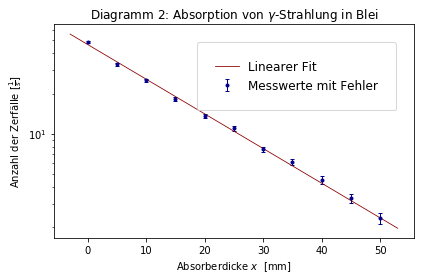

In [8]:
#Plot der Messdaten
plt.errorbar(x2,n_gamma_korr, yerr=n_gamma_korr_err,linewidth=1,linestyle='',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.plot(np.linspace(-3,53,2),exp_fit(np.linspace(-3,53,2),*popt),color='darkred',label='Linearer Fit', linewidth=0.8)
plt.xlabel(r'Absorberdicke $ x$  [mm]')
plt.ylabel(r'Anzahl der Zerfälle [$\frac{1}{s}$]')
plt.yscale('log')
plt.legend(frameon=True,fontsize='large',loc='best', borderpad=1.5, borderaxespad=1.5)
plt.title(r'Diagramm 2: Absorption von $\gamma$-Strahlung in Blei')

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V253Diagramm2.pdf', format='PDF')

In [9]:
#Güte des Fits
chi_squared2=np.sum((exp_fit(x2,*popt)-n_gamma_korr)**2/n_gamma_korr_err**2)

#Freiheitsgrade
dof2=len(n_gamma_korr)-2

chi_squared2_red=chi_squared2/dof2

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared2))
print('chi_squared_red= ' + str(chi_squared2_red))
print()

#Fitwahrscheinlichkeit
prob2=round(1-chi2.cdf(chi_squared2,dof2),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob2) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 17.9691199921
chi_squared_red= 1.99656888802

Die Fitwahrscheinlichkeit beträgt: 4.0 %


In [10]:
#Schwächungskoeffizient aus Geradensteigung
mu=10*popt[1]  #1/cm
mu_err=10*(perr[1])
print('Aus dem linearen Fit folgt für den Schwächungskoeffizienten:')
print('mu = (' + str(mu) + ' +/- ' + str(mu_err) + ') 1/cm' )

#Massenschwächungskoeffizient
rho_pb=11.342 #g/cm^3

mu_rho=mu/rho_pb  #cm^2/g
mu_rho_err=mu_rho*(mu_err/mu)

print()
print('Für den materialunabhängigen Massenschwächungskoeffizienten mu/rho folgt:')
print('mu/rho = (' + str(mu_rho) + ' +/- ' + str(mu_rho_err) + ') cm^2/g')

Aus dem linearen Fit folgt für den Schwächungskoeffizienten:
mu = (0.59806185882 +/- 0.0117207387884) 1/cm

Für den materialunabhängigen Massenschwächungskoeffizienten mu/rho folgt:
mu/rho = (0.0527298411938 +/- 0.00103339259287) cm^2/g


Ablesen der zugehörigen Energie aus Diagramm 9 in der Anleitung liefert:
$E_\gamma= 1.4 \pm 0.1 \ MeV$ 

Die beiden möglichen Übergänge haben nach Skript die beiden Energien $E_1= 1.173\ MeV$ und $E_2= 1.333\ MeV$.

Der gemessene Wert ist im 3$\sigma$- bzw. 1$\sigma$-Intervall mit den Literaturwerten vereinbar.

### Teil 4: Aktivität des vorliegenden $\gamma$-Strahlers

In [11]:
#Abstand Präparat und Zählrohr
d=np.array([0.05,0.10,0.20]) 
d_err=5e-3*np.ones(3)

#registrierte Zerfälle, direkt in Zerfälle/s
N=1/60*np.array([49020, 12812, 3479])
N_err=1/60*np.sqrt(60*N)

#Radius des Zählrohrs
r=7e-3 #m

#Raumwinkel
Omega=np.pi*r**2/d**2
Omega_err=Omega*2*d_err/d

#Ansprechwahrscheinlichkeit Zählrohr für gamma-Strahlung
epsilon= 0.04 
epsilon_err=epsilon*0.03

#Aktivität für gesamte Kugelfläche
A=0.5*4*N/epsilon*d**2/r**2 #Faktor 0.5, da 2 gamma-Quanten pro Zerfall
A_err=A*np.sqrt((N_err/N)**2+(d_err/d)**2+(epsilon_err/epsilon)**2)

print('Für die Aktivität A des Gamma-Strahlers folgt:')
print('A = ' + str(A*1e-3)+' kBq') 
print('+/- '  + str(A_err*1e-3)+' kBq') 

Für die Aktivität A des Gamma-Strahlers folgt:
A = [ 2084.18367347  2178.91156463  2366.66666667] kBq
+/- [ 217.79868807  128.50133172  100.75550491] kBq


In [18]:
#Herstellerangabe: 2525kBq am 1.01.2018
A0=2525e3 #Bq
#Versuchsdatum: 27.02.2018; Differenz:31+27=58 Tage = 0.159 Jahre
del_t=0.159 #Jahre
#Halbwertszeit nach Skript T12=5.27 Jahre
T12=5.27 #Jahre

#Aktivität am Versuchstag
A_lit=A0*np.exp(-np.log(2)*del_t/T12)

print('Für die Aktivität A_lit des Gamma-Strahlers am Versuchstag folgt:')
print('A_lit = ' + str(A_lit*1e-3)+' kBq')

Für die Aktivität A_lit des Gamma-Strahlers am Versuchstag folgt:
A_lit = 2472.74352484 kBq


In [19]:
#Vergleich der Messwerte mit Literaturwert
diff_A=np.abs(A-A_lit)
diff_A_err=A_err

print('Der Vergleich mit dem Literaturwert liefert:')
print('diff = ' + str(diff_A*1e-3)+' kBq') 
print('   +/- '  + str(diff_A_err*1e-3)+' kBq') 
print('Damit folgt Sigma =',(diff_A/diff_A_err).round(2))

Der Vergleich mit dem Literaturwert liefert:
diff = [ 388.55985137  293.83196022  106.07685818] kBq
   +/- [ 217.79868807  128.50133172  100.75550491] kBq
Damit folgt Sigma = [ 1.78  2.29  1.05]


#### 4.1: Raumwinkel-Korrektur

In [20]:
#Länge l des Zählrohrs: l=4cm
l=4e-2 #m

#Korrekturfaktor k1=(1+0.5*l/d)**2
k1=(1+0.5*l/d)**2
k1_err=2*(1+0.5*l/d)*0.5*l/d**2*d_err

print('Der Korrekturfaktor k1 ergibt sich zu:')
print('k1 = ' + str(k1))
print(' +/- '  + str(k1_err)) 
print()

#korrigierte Aktivität A_korr=A*k1
A_korr=A*k1
A_korr_err=A_korr*np.sqrt((A_err/A)**2+(k1_err/k1)**2)

print('Die korrigierte Aktivität A_korr ergibt sich zu:')
print('A_korr = ' + str(A_korr*1e-3)+' kBq')
print('     +/- '  + str(A_korr_err*1e-3)+' kBq')

Der Korrekturfaktor k1 ergibt sich zu:
k1 = 1.3061224489795917
 +/- [ 0.01166181  0.01166181  0.01166181]

Die korrigierte Aktivität A_korr ergibt sich zu:
A_korr = [ 2722.19908372  2845.9253089   3091.15646259] kBq
     +/- [ 285.50819579  169.75106448  134.46204818] kBq


In [21]:
#Vergleich der Messwerte mit Literaturwert
diff_A_korr=np.abs(A_korr-A_lit)
diff_A_korr_err=A_korr_err

print('Der Vergleich mit dem Literaturwert liefert:')
print('diff = ' + str(diff_A_korr*1e-3)+' kBq') 
print('   +/- '  + str(diff_A_korr_err*1e-3)+' kBq') 
print('Damit folgt Sigma =',(diff_A_korr/diff_A_korr_err).round(2))

Der Vergleich mit dem Literaturwert liefert:
diff = [ 249.45555887  373.18178406  618.41293774] kBq
   +/- [ 285.50819579  169.75106448  134.46204818] kBq
Damit folgt Sigma = [ 0.87  2.2   4.6 ]


#### 4.2: Absorptions-Korrektur

In [22]:
#Präparatkapseldaten
d=0.14 #cm
rho_kapsel=7.9 #g/cm^3
#mu_rho aus vorherigem Aufgabenteil
mu_kapsel=mu_rho*rho_kapsel #1/cm
mu_kapsel_err=mu_kapsel*mu_rho_err/mu_rho

#Korrekturfaktor k2=exp(-mu*x)
k2=np.exp(-mu_kapsel*d)
k2_err=k2*d*mu_kapsel_err

print('Der Korrekturfaktor k2 ergibt sich zu:')
print('k2 = ' + str(k2)+' +/- '  + str(k2_err))
print()

#korrigierte Aktivität A_korr2=A_korr*k2
A_korr2=A_korr*k2
A_korr2_err=A_korr2*np.sqrt((A_korr_err/A_korr)**2+(k2_err/k2)**2)

print('Die korrigierte Aktivität A_korr2 ergibt sich zu:')
print('A_korr2 = ' + str(A_korr2*1e-3)+' kBq')
print('      +/- ' + str(A_korr2_err*1e-3)+' kBq') 

Der Korrekturfaktor k2 ergibt sich zu:
k2 = 0.943348778329 +/- 0.00107818370186

Die korrigierte Aktivität A_korr2 ergibt sich zu:
A_korr2 = [ 2567.98317999  2684.70016336  2916.0386726 ] kBq
      +/- [ 269.34979929  160.16385459  126.88838634] kBq


In [23]:
#Vergleich der Messwerte mit Literaturwert
diff_A_korr2=np.abs(A_korr2-A_lit)
diff_A_korr2_err=A_korr2_err

print('Der Vergleich mit dem Literaturwert liefert:')
print('diff = ' + str(diff_A_korr2*1e-3)+' kBq') 
print('   +/- '  + str(diff_A_korr2_err*1e-3)+' kBq') 
print('Damit folgt Sigma =',(diff_A_korr2/diff_A_korr2_err).round(2))

Der Vergleich mit dem Literaturwert liefert:
diff = [  95.23965515  211.95663852  443.29514776] kBq
   +/- [ 269.34979929  160.16385459  126.88838634] kBq
Damit folgt Sigma = [ 0.35  1.32  3.49]


### Teil 5: Absorptionsmessung und Energiebestimmung von $\alpha$-Strahlung

In [50]:
#Anzahl Zerfälle
n_alpha=np.array([4908, 4829, 4820, 4612, 346, 73, 82, 62, 76, 59, 79, 93, 78, 3783, 1005])
n_alpha_err=np.sqrt(n_alpha)

#Torzeit immer 60s

#Druck in mbar
p=np.array([27, 111, 204, 297, 403, 512, 602, 702, 820, 898, 983, 434, 462, 331, 381])
p_err = np.ones(15)

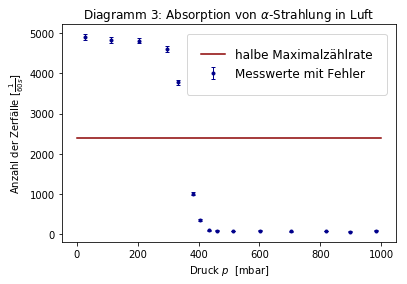

In [54]:
#Plot der Messdaten
plt.errorbar(p,n_alpha, yerr=n_alpha_err,linewidth=1,linestyle='',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.xlabel(r'Druck $ p$  [mbar]')
plt.ylabel(r'Anzahl der Zerfälle [$\frac{1}{60s}$]')
plt.plot([0,1e3],2400*np.ones(2),color='darkred',label='halbe Maximalzählrate')
#plt.yscale('log')
plt.legend(frameon=True,fontsize='large',loc='best', borderpad=1.2, borderaxespad=0.8)
plt.title(r'Diagramm 3: Absorption von $\alpha$-Strahlung in Luft')
plt.savefig('Diagramme/V253Diagramm3.pdf', format='PDF')

In [25]:
#Druck p1, bei dem die Zählrate auf die Hälfte abgefallen ist
p1=351 #mbar
p1_err=20
#Normaldruck
p0=1013 #mbar
#Abstand Präparat - Zählrohr
s0=3.95 #cm
s0_err=0.05

#Reichweite bei p1
s1=p1/p0*s0
s1_err=s1*np.sqrt((p1_err/p1)**2+(s0_err/s0)**2)

In [26]:
#Korrekturen
#Flächendichte Glimmerfenster
rho_Gl=2.25 #mg/cm^2
s2=rho_Gl/1.43 #cm

#Schutzschicht aus Gold
s3=0.68 #cm

s_ges=s1+s2+s3
s_ges_err=s1_err

print('Die Gesamtreichweite ergibt sich zu:')
print('s_ges = (' + str(s_ges)+' +/- '  + str(s_ges_err)+') cm')

Die Gesamtreichweite ergibt sich zu:
s_ges = (3.622084026536149 +/- 0.0798873716397) cm


In [57]:
#Aus Diagramm 8 ergibt sich eine Energie von E_alpha= 5.3 +/- 0.2 MeV
E_alpha=5.3 #MeV
E_alpha_err=0.2

#Vergleich mit Literaturwert (aus Skript) liefert:
E_alpha_lit=5.48 #MeV

diff2=np.abs(E_alpha-E_alpha_lit)
diff2_err=E_alpha_err

print('Der Vergleich mit dem Literaturwert ('+str(E_alpha_lit)+' MeV) liefert:')
print('∆E_alpha =(' + str(diff2) + ' +/- ' + str(diff2_err)+ ') MeV')
print('Damit folgt Sigma =',round(diff2/diff2_err,2))

Der Vergleich mit dem Literaturwert (5.48 MeV) liefert:
∆E_alpha =(0.18 +/- 0.2) MeV
Damit folgt Sigma = 0.9
